In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#data_url = "https://www.kaggle.com/uciml/sms-spam-collection-dataset"
data = pd.read_csv("K:\Bibilo\Data Science\Machine learning\Code\Assignment_6\spam.csv",encoding = "ISO-8859-1", engine = "python")

In [4]:
# Explore the data
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [28]:
# Data cleaning
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [31]:
# Text preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalpa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [32]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [43]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [ps.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [47]:
data['message'] = data['v2'].apply(preprocess_text)

In [45]:
# Label encoding
data['label'] = data['v1'].map({'ham': 0, 'spam': 1})

In [48]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['v2'])
y = data['v1']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
missing_values = data.isnull().sum()

In [22]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


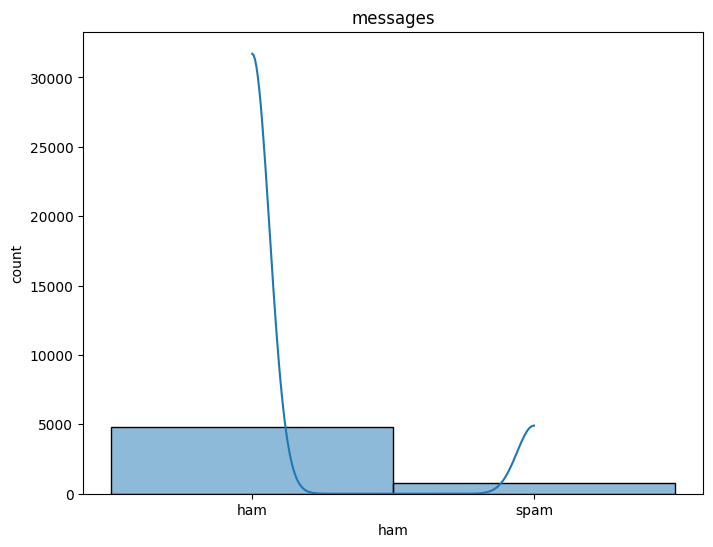

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data['v1'], bins=30, kde=True)
plt.title("messages")
plt.xlabel("ham")
plt.ylabel("count")
plt.show()